In [1]:
import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as sts

In [19]:
sleep_list = []

for num in range(1,23):
    user_sleep_df = pd.read_csv(f'DataPaper/user_{num}/sleep.csv')
    user_sleep_df['User'] = num
    user_sleep_df.set_index(['User'])
    sleep_list.append(user_sleep_df)
    
sleep_df = pd.concat(sleep_list)
sleep_df.head()

,Unnamed: 0,In Bed Date,In Bed Time,Out Bed Date,Out Bed Time,Onset Date,Onset Time,Latency,Efficiency,Total Minutes in Bed,Total Sleep Time (TST),Wake After Sleep Onset (WASO),Number of Awakenings,Average Awakening Length,Movement Index,Fragmentation Index,Sleep Fragmentation Index,User
0,0,2,00:46,2,03:31,2,00:46,0,87.27,165,144,21,9,2.33,9.091,10,19.091,1
1,1,2,03:57,2,07:30,2,03:57,0,92.02,213,196,17,9,1.89,8.92,0,8.92,1
0,0,2,00:50,2,06:22,2,00:54,4,73.49,332,244,84,18,4.67,15.06,5.556,20.616,2
0,0,1,22:29,1,05:52,1,22:32,3,79.23,443,351,89,16,5.56,18.962,0,18.962,3
0,0,2,00:57,2,07:10,2,01:01,4,85.52,373,319,50,28,1.79,8.847,14.286,23.133,4


In [20]:
sleep_df_cleaned=sleep_df[['Total Minutes in Bed', 'Total Sleep Time (TST)','Number of Awakenings', 'User',]]
sleep_df_cleaned.head()

,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings,User
0,165,144,9,1
1,213,196,9,1
0,332,244,18,2
0,443,351,16,3
0,373,319,28,4


**questionnaire.csv - scores for all the questionnaires:**

In [21]:
stress_list = []

for num in range(1,23):
    user_stress_df = pd.read_csv(f'DataPaper/user_{num}/questionnaire.csv')
    user_stress_df['User'] = num
    user_stress_df.set_index(['User'])
#     user_sleep_df = user_sleep_df.merge(stress_df)
    stress_list.append(user_stress_df)
    
user_stress_df = pd.concat(stress_list)
user_stress_df.head()

,Unnamed: 0,MEQ,STAI1,STAI2,Pittsburgh,Daily_stress,BISBAS_bis,BISBAS_reward,BISBAS_drive,BISBAS_fun,...,panas_pos_14,panas_pos_18,panas_pos_22,panas_pos_9+1,panas_neg_10,panas_neg_14,panas_neg_18,panas_neg_22,panas_neg_9+1,User
0,0,47.0,41.0,43.0,5.0,23.0,22.0,21.0,14.0,14.0,...,17.0,12.0,18.0,17.0,11.0,13.0,13.0,10.0,10.0,1
0,0,52.0,24.0,39.0,7.0,26.0,26.0,21.0,12.0,6.0,...,32.0,24.0,27.0,33.0,11.0,10.0,16.0,17.0,18.0,2
0,0,59.0,27.0,27.0,8.0,11.0,19.0,18.0,12.0,6.0,...,34.0,31.0,28.0,35.0,11.0,12.0,11.0,12.0,11.0,3
0,0,60.0,28.0,40.0,4.0,10.0,20.0,17.0,13.0,14.0,...,27.0,22.0,19.0,26.0,11.0,13.0,15.0,14.0,14.0,4
0,0,52.0,54.0,47.0,8.0,41.0,25.0,23.0,14.0,15.0,...,25.0,31.0,27.0,31.0,26.0,17.0,17.0,15.0,16.0,5


In [5]:
stress_list_cleaned= user_stress_df[['STAI1','STAI2','Pittsburgh', 'Daily_stress', 'User' ]]
stress_list_cleaned.head()

,STAI1,STAI2,Pittsburgh,Daily_stress,User
0,41.0,43.0,5.0,23.0,1
0,24.0,39.0,7.0,26.0,2
0,27.0,27.0,8.0,11.0,3
0,28.0,40.0,4.0,10.0,4
0,54.0,47.0,8.0,41.0,5


In [6]:
new_merge=pd.merge(stress_list_cleaned, sleep_df_cleaned, on=['User'])
new_merge=new_merge.astype(float)
new_merge.head()

,STAI1,STAI2,Pittsburgh,Daily_stress,User,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings
0,41.0,43.0,5.0,23.0,1.0,165.0,144.0,9.0
1,41.0,43.0,5.0,23.0,1.0,213.0,196.0,9.0
2,24.0,39.0,7.0,26.0,2.0,332.0,244.0,18.0
3,27.0,27.0,8.0,11.0,3.0,443.0,351.0,16.0
4,28.0,40.0,4.0,10.0,4.0,373.0,319.0,28.0


In [7]:
new_merge.corr()

,STAI1,STAI2,Pittsburgh,Daily_stress,User,Total Minutes in Bed,Total Sleep Time (TST),Number of Awakenings
STAI1,1.000000,0.326809,-0.041582,-0.000576,0.121308,-0.234766,-0.077588,-0.345845
STAI2,0.326809,1.000000,-0.210109,-0.420389,0.172877,-0.249510,-0.132620,-0.294947
Pittsburgh,-0.041582,-0.210109,1.000000,0.111963,-0.441586,0.363139,0.339733,-0.190674
Daily_stress,-0.000576,-0.420389,0.111963,1.000000,0.042053,0.271100,0.243392,0.242953
User,0.121308,0.172877,-0.441586,0.042053,1.000000,0.168839,0.190426,0.197575
Total Minutes in Bed,-0.234766,-0.249510,0.363139,0.271100,0.168839,1.000000,0.948625,0.271305
Total Sleep Time (TST),-0.077588,-0.132620,0.339733,0.243392,0.190426,0.948625,1.000000,0.048110
Number of Awakenings,-0.345845,-0.294947,-0.190674,0.242953,0.197575,0.271305,0.048110,1.000000


In [8]:
# Use this code starter to 
# combine all the user dataframes into depending on your analysis

all_activity_df_list = []

for num in range(1,23):
    user_activity_df = pd.read_csv(f'DataPaper/user_{num}/Activity.csv')
    user_activity_df['User'] = num
    user_activity_df.set_index(['User'])
    all_activity_df_list.append(user_activity_df)

all_activity_df = pd.concat(all_activity_df_list)
all_activity_df
all_activity=all_activity_df.drop(['Unnamed: 0'], axis=1)
all_activity.index.name='ID'
all_activity.head()

,Activity,Start,End,Day,User
ID,,,,,
0,2,10:00,10:22,1,1
1,9,10:37,10:40,1,1
2,10,10:40,10:45,1,1
3,6,10:55,11:00,1,1
4,2,11:00,11:20,1,1


In [9]:
all_activity.loc[all_activity['End']=='24:00', 'End']='0:00'

In [10]:
all_activity['Activity'].unique()

array([ 2,  9, 10,  6,  7,  4,  3,  5,  8,  1,  0, 12, 11], dtype=int64)

In [11]:
#Change start and end to date time
#pd.to_datetime(all_activity_df[["Start"]])
all_activity["Start"]=pd.to_datetime(all_activity["Start"],format= '%H:%M').dt.time
all_activity["End"]=pd.to_datetime(all_activity["End"],format= '%H:%M').dt.time
#all_activity_df['End'

In [12]:
all_activity = all_activity.dropna()
difer = []
for i in range(len(all_activity['End'])):
    #print(type(all_activity_df['End'].iloc[i]))
    dateTime_end = datetime.datetime.combine(datetime.date.today(),  all_activity['End'].iloc[i])
    dateTime_start = datetime.datetime.combine(datetime.date.today(), all_activity['Start'].iloc[i])
    dif = dateTime_end - dateTime_start
    difer.append((dif.total_seconds() / 60))


In [13]:
pd.set_option('display.max_rows', None)
all_activity['Duration [minutes]'] = pd.Series(difer)
all_activity.head()
all_activity

,Activity,Start,End,Day,User,Duration [minutes]
ID,,,,,,
0,2,10:00:00,10:22:00,1,1,22.0
1,9,10:37:00,10:40:00,1,1,3.0
2,10,10:40:00,10:45:00,1,1,5.0
3,6,10:55:00,11:00:00,1,1,5.0
4,2,11:00:00,11:20:00,1,1,20.0
5,7,12:00:00,13:00:00,1,1,60.0
6,4,13:30:00,13:35:00,1,1,5.0
7,10,13:35:00,13:40:00,1,1,5.0
8,3,13:40:00,13:45:00,1,1,5.0


**Activity_csv**

In [23]:
all_activity_new= all_activity[["Activity", "Duration [minutes]","Day","User"]]
all_activity_new=all_activity_new.groupby(by=(['User','Day', 'Activity'])).sum().reset_index()
all_activity_new.head()

,User,Day,Activity,Duration [minutes]
0,1,1,2,257.0
1,1,1,3,50.0
2,1,1,4,10.0
3,1,1,5,10.0
4,1,1,6,130.0


In [16]:
all_activity_pivot=all_activity_new.pivot_table(values='Duration [minutes]', index=(['User','Day']), columns='Activity').reset_index()
all_activity_pivot.head()

Activity,User,Day,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,1,NaN,NaN,257.0,50.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,NaN,NaN
1,1,2,NaN,5.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,NaN,NaN,132.0,100.0,5.0,NaN,138.0,20.0,5.0,5.0,NaN,NaN,NaN
3,2,2,45.0,40.0,10.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0
4,3,1,NaN,5.0,5.0,70.0,5.0,35.0,10.0,22.0,NaN,23.0,NaN,NaN,NaN


In [17]:
pd.set_option('display.max_rows', None)
renamed_columns_df = all_activity_pivot.rename(columns={0:"No activity", 1:"Sleeping", 2:"Laying Down", 3:"Sitting", 4:"Light Movement", 
                                                   5:"Medium", 6:"Heavy", 7:"Eating", 8:"Small Screen Usage", 9:"Large Screen Usage", 
                                                10:"Caffeinated Drink Consumption", 11:"Smoking",12:"Alcohol Consumption"},errors="raise")
renamed_columns_df.head()
renamed_columns_df=renamed_columns_df.fillna(0)
renamed_columns_df.head()

Activity,User,Day,No activity,Sleeping,Laying Down,Sitting,Light Movement,Medium,Heavy,Eating,Small Screen Usage,Large Screen Usage,Caffeinated Drink Consumption,Smoking,Alcohol Consumption
0,1,1,0.0,0.0,257.0,50.0,10.0,10.0,130.0,60.0,45.0,13.0,50.0,0.0,0.0
1,1,2,0.0,5.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,0.0,0.0,132.0,100.0,5.0,0.0,138.0,20.0,5.0,5.0,0.0,0.0,0.0
3,2,2,45.0,40.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
4,3,1,0.0,5.0,5.0,70.0,5.0,35.0,10.0,22.0,0.0,23.0,0.0,0.0,0.0


In [ ]:

#columns_day1=columns_day1.set_index(['User'])
#columns_day1=columns_day1.rename_axis(None, axis=1).rename_axis('id', axis=0)
columns_day1=columns_day1[['No activity', 'Laying Down', 'Sitting', 'Light Movement', 'Medium',
                           'Heavy', 'Eating','Small Screen Usage', 'Large Screen Usage', 
                           'Caffeinated Drink Consumption','Smoking', 'Alcohol Consumption']]
columns_day1=columns_day1.reset_index().head()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


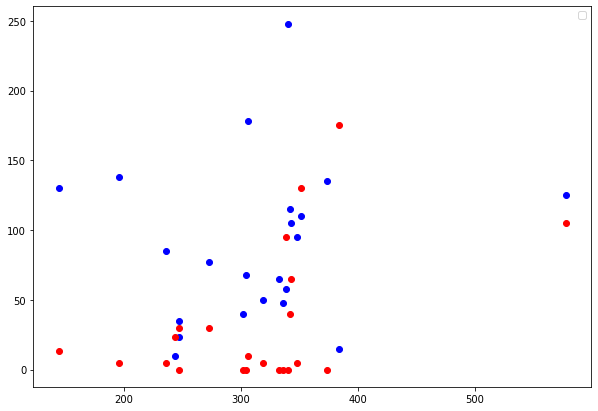

In [29]:
plt.figure(figsize = (10,7))
plt.scatter(columns_day1['Total Sleep Time (TST)'], columns_day1['Heavy'] , color = 'b')
plt.scatter(columns_day1['Total Sleep Time (TST)'], columns_day1['Large Screen Usage'] , color = 'r')
plt.legend()